# **Music Feature Extraction**

---

In the realm of music analysis, feature extraction plays a vital role in unraveling the mysteries concealed within audio data. By converting raw audio signals into comprehensible and representative features, we gain valuable insights into the characteristics and relationships of music. These extracted features serve as the foundation for classification, prediction, and recommendation algorithms, enabling us to classify music genres or provide personalized recommendations based on individual preferences. With its ability to decipher the intricate dimensions of time, amplitude, and frequency, feature extraction unlocks the true essence of music, offering a transformative understanding of its hidden patterns and harmonies.*italicized text*

## **Importing Dependencies**

In [1]:
# Importing the dependencies to be used
import os
import warnings
import librosa
import soundfile as sf
import IPython.display as ipd
import sklearn
import matplotlib.pyplot as plt
import librosa.display
import csv
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras
from keras import models
from keras import layers


## **Loading and Playing sample Audio**

In [2]:
# Suppress warning messages
warnings.filterwarnings('ignore')

# Loading an audio file
audio_path = 'dog_barking.wav'
x, sr = librosa.load(audio_path) # 'x' as Time series; 'sr' as Sampling Rate
print("Data Type of 'x' and 'sr':", type(x), type(sr))

Data Type of 'x' and 'sr': <class 'numpy.ndarray'> <class 'int'>


In [3]:
# Playing Audio
ipd.Audio(audio_path)

## **Visualizing Audio**
---

### **1. Waveform**
Provides the amplitude of the audio over time, with amplitude on the vertical axis and time on the horizontal axis.

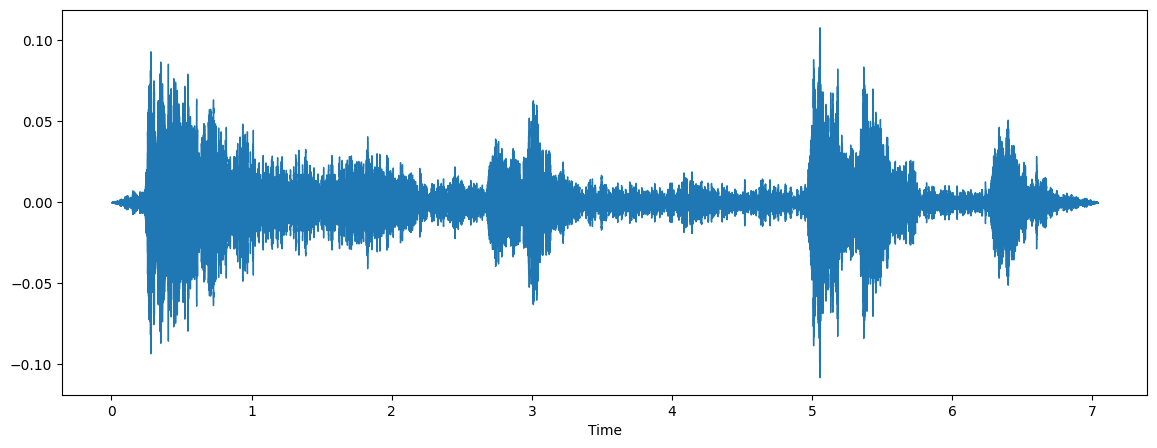

In [4]:
# Plot the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
plt.show()

### **2. Spectogram**
---
Provides a visual representation of how the frequencies of sound or signals evolve over time, offering valuable insights into the temporal dynamics of music.

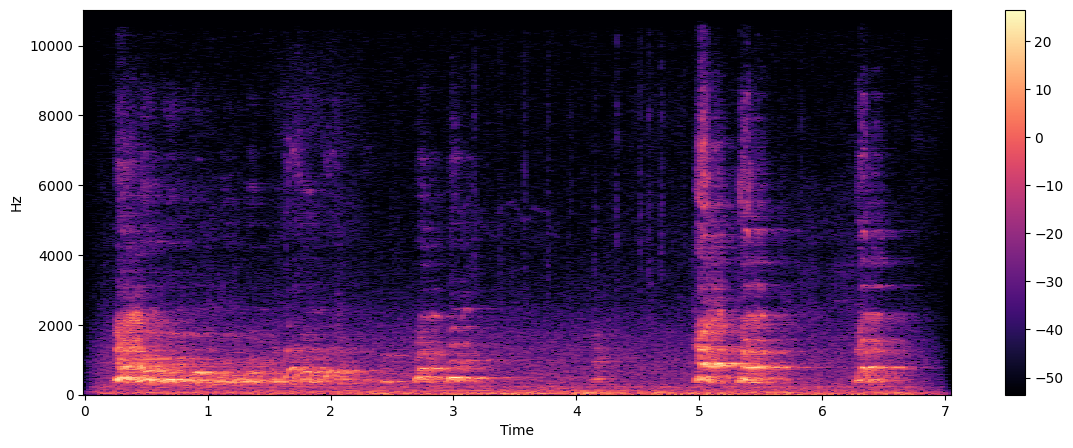

In [5]:
# Display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

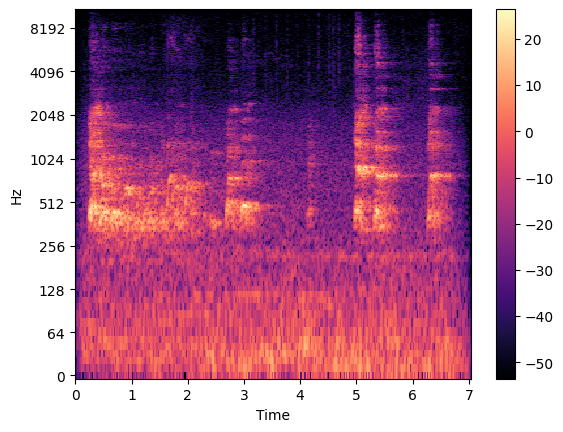

In [6]:
# To pring Log Frequency axis
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

## **Creating an audio signal**
---
Audio signals are saved for later use of feature extraction because it focuses on computational methods for altering the sounds. (https://devopedia.org/audio-feature-extraction)

In [7]:
import numpy as np

sr = 22050 # Sample rate
T = 5.0    # Seconds
t = np.linspace(0, T, int(T * sr), endpoint = False) # Time variable
x = 0.5 * np.sin(2 * np.pi * 220 * t) # Pure sine wave at 220 Hz

In [8]:
# Load a NumPy array
ipd.Audio(x, rate=sr)

In [9]:
# Saving the signal as a wave file
sf.write('sample1.wav', x, sr)

## **Feature Extraction**

### **1. Zero Crossing Rate**


Measures how frequently a signal changes from positive to negative or vice versa. It is commonly employed in speech recognition and music information retrieval, with higher values often associated with percussive sounds found in genres like metal and rock.


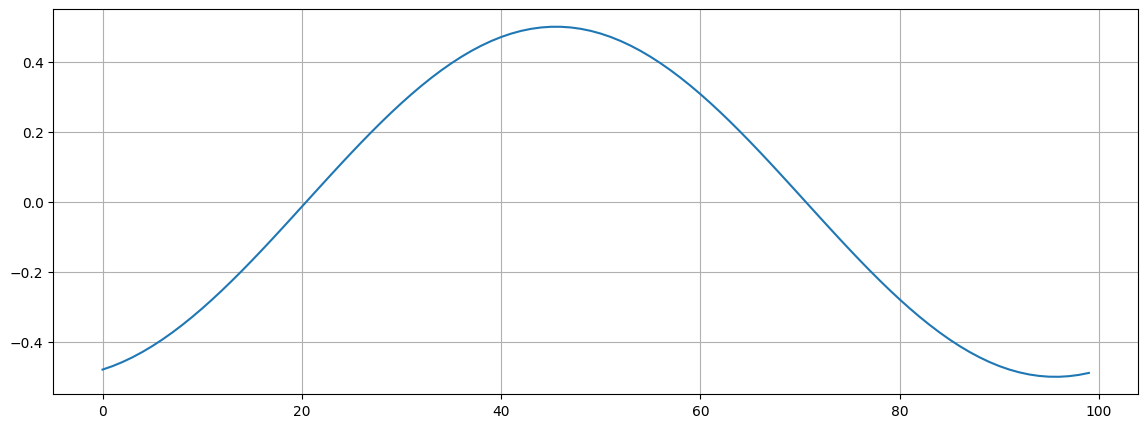

In [10]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [11]:
# Calculating zero crossings
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossings.shape

(100,)

In [12]:
print("Total sum of zero crossings:", sum(zero_crossings))

Total sum of zero crossings: 2


### **2. Spectral Centroid**


Identifies the central position or "center of mass" of a sound by considering the frequencies present in it. It can be interpreted as a weighted average of the frequencies, reflecting the distribution of energy within the sound. When the frequencies are uniformly distributed, the spectral centroid tends to be centered, but if there is a concentration of high frequencies towards the end of the sound, the centroid will be shifted towards that end.

In [13]:
# Defining normalize as the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [14]:
# Spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
spectral_centroids.shape

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

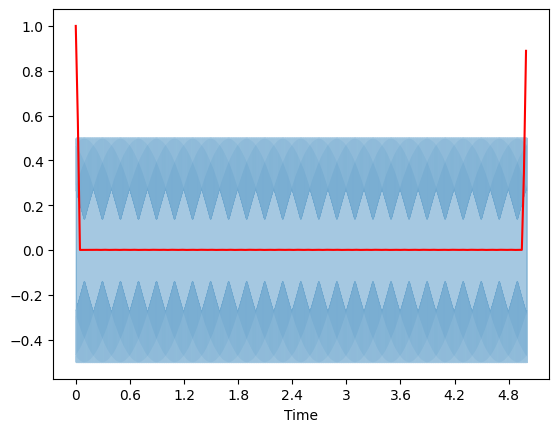

In [15]:
# Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

### **3. Spectral Rolloff**

Determines the frequency below which a certain percentage, such as 85%, of the total spectral energy of a signal is contained. This metric provides frame-wise results, indicating the spectral rolloff value for each individual frame of the signal


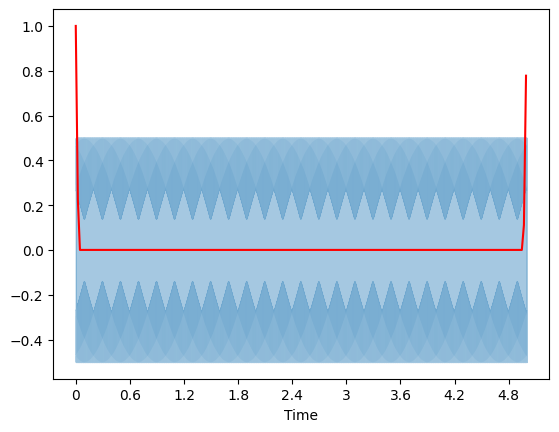

In [16]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr)[0]
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

### **4. Mel-Frequency Cepstral Coefficients (MFCC)**

Widely utilized when working with audio signals, as they capture key characteristics of the spectral envelope using a compact set of features, typically ranging from 10 to 20. These coefficients provide a concise representation of the overall shape of the audio signal's frequency spectrum.



(20, 216)


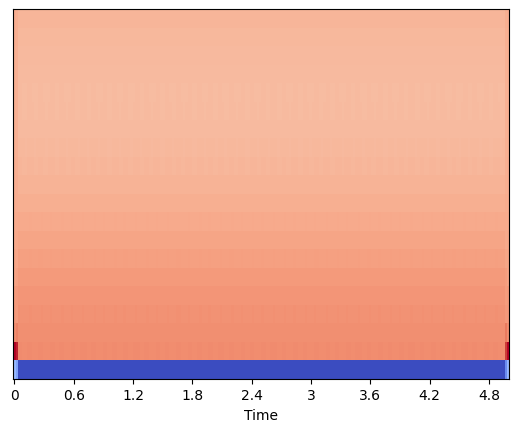

In [17]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)

# Display the MFCCs
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

### **5. Feature Scaling**

To rescale each coefficient dimension such that it has a mean of zero and a variance of one. This scaling process ensures that the MFCCs are adjusted to a consistent distribution, facilitating fair comparisons and improved performance in subsequent analysis or modeling tasks.

In [18]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print("mean:")
print(mfccs.mean(axis=1))
print("variance:")
print(mfccs.var(axis=1))

mean:
[ 2.42604291e-15  1.64477485e-16 -3.10862447e-15  4.85208581e-16
  3.23198258e-15  7.77156117e-16 -1.80514040e-15 -1.19657370e-15
 -1.74757328e-17  7.85379991e-16  1.59131967e-15  1.56253611e-16
 -1.36516313e-15  1.23358114e-15  7.89491929e-16 -1.96139401e-15
 -7.23700935e-16 -2.46716228e-17 -4.93432455e-17 -1.08966334e-15]
variance:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


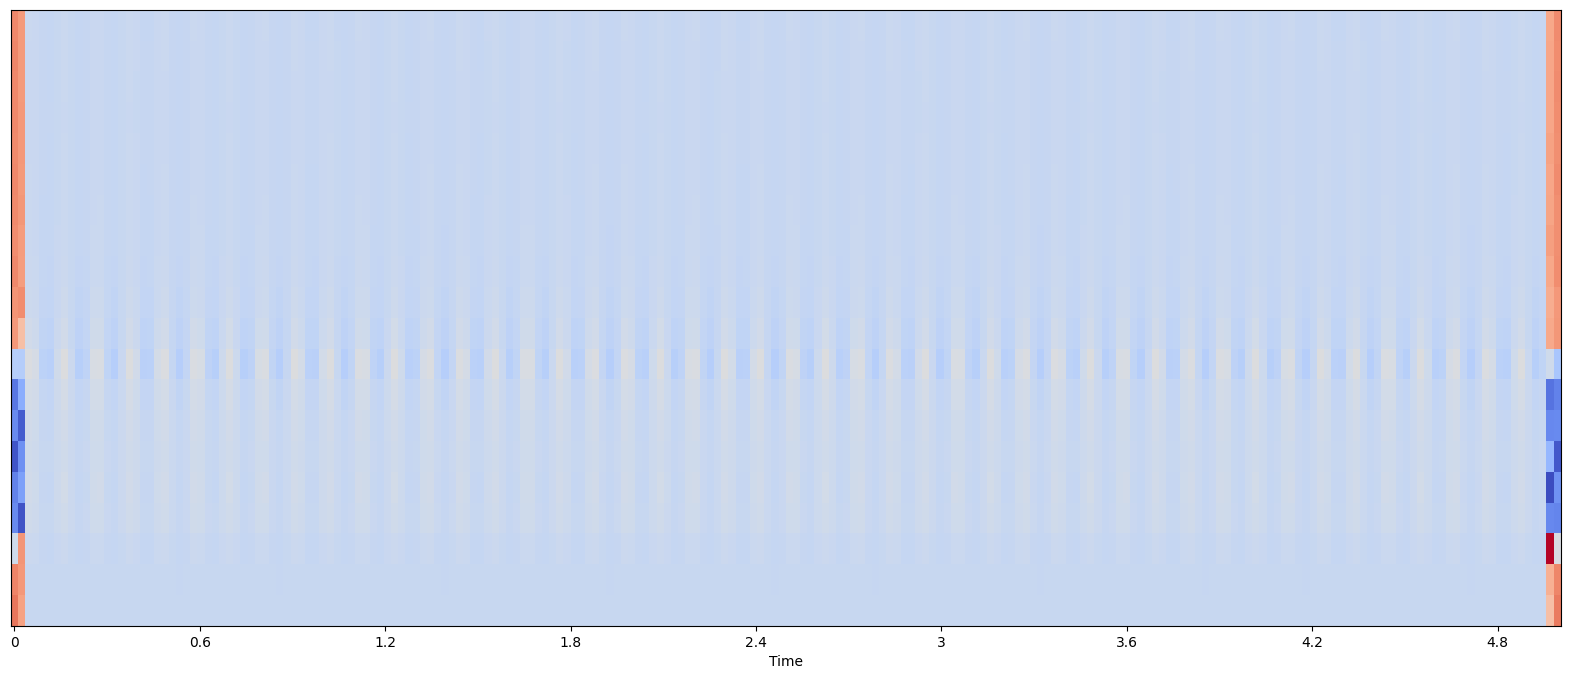

In [19]:
plt.figure(figsize=(20,8))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

### **6. Chroma Frequencies**

Set of 12 features that represent the 12 different pitch classes in music. They are used to represent the tonal content of a piece of music and are often used in music information retrieval tasks such as genre classification and chord recognition.
(https://www.researchgate.net/publication/330796993_Chroma_Feature_Extraction)

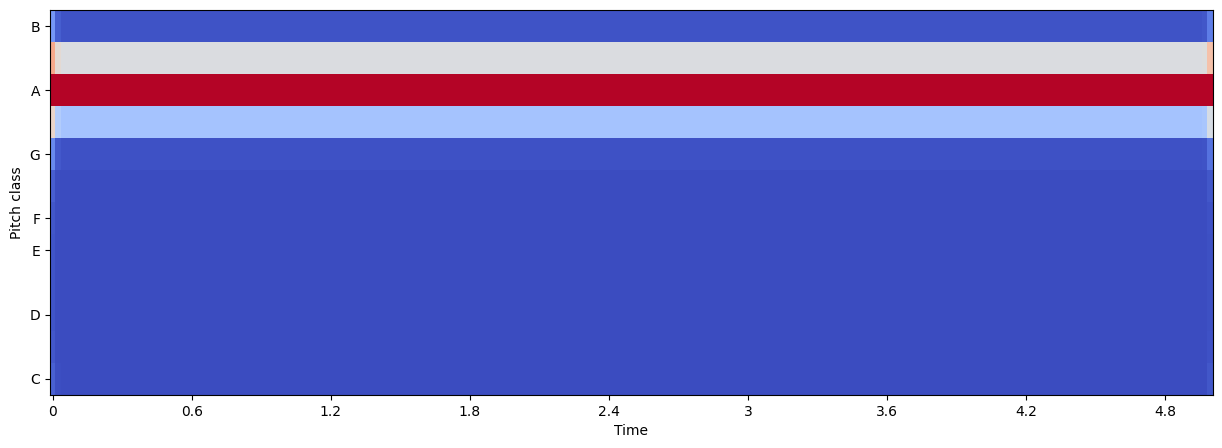

In [20]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

# **Creating Dataset**
---



In [21]:
# Create a CSV file with the data we required
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [22]:
header = ["filename", "chroma_stft", "rmse", "spec_cent", "spec_bw", "rolloff", "zcr", "mfcc", "genre"]

genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()

with open('data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    
    for g in genres:
        for filename in os.listdir(f'./genres/{g}'):
            songname = f'./genres/{g}/{filename}'
            y, sr = librosa.load(songname, mono=True, duration=30)
            
            chroma_stft = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
            rmse = np.sqrt(np.mean(np.square(y)))
            spec_cent = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
            spec_bw = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
            rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
            zcr = np.mean(librosa.feature.zero_crossing_rate(y))
            mfcc = librosa.feature.mfcc(y=y, sr=sr)
            mfcc_mean = np.mean(mfcc, axis=1)
            
            to_append = [filename, chroma_stft, rmse, spec_cent, spec_bw, rolloff, zcr]
            to_append += list(mfcc_mean)
            to_append.append(g)
            
            writer.writerow(to_append)

### **Preprocessing Dataset**


In [23]:
# Reading a dataset
data = pd.read_csv('data.csv')
data.head()

,,,,,,,,,,,,,,,,,,,filename,chroma_stft,rmse,spec_cent,spec_bw,rolloff,zcr,mfcc,genre
baritone-guitar-blues-7746.mp3,0.443449,0.121086,1340.896201,1932.315619,2913.107385,0.037328,-194.62218,127.63991,2.427625,36.150597,9.396183,14.413915,14.366480,11.722455,-1.315321,4.290704,5.484897,10.676336,2.110842,-1.926120,-3.437525,0.805604,-1.909686,-0.252524,-3.170701,-1.860498,blues
blues-garage-northern-hills-99310.mp3,0.283851,0.157692,746.361645,1419.667705,1229.092568,0.028234,-293.19385,177.67738,63.524440,1.675590,4.279604,3.849333,2.690368,14.793142,9.551473,-2.969425,-9.212777,-1.839449,1.370192,2.006034,-2.925370,-3.487169,-9.774089,-2.456323,2.961546,9.661028,blues
blues-vibes-100-bpm-michael-kobrin-3780.mp3,0.310607,0.214117,912.070377,1573.548262,1666.281591,0.023784,-271.14627,129.31530,49.322872,37.999600,-2.409456,4.380362,20.449123,2.215291,-5.813223,7.759621,-6.318469,4.309891,-15.741668,-3.334427,-4.345895,-9.882723,-7.192693,-5.359397,-3.117808,-7.251347,blues
chicago-shuffle-blues-3912.mp3,0.379897,0.079750,1966.181058,2161.222782,4177.441406,0.083124,-228.00174,94.56738,-9.920053,43.148860,6.359913,14.239382,5.282632,12.851759,2.393912,1.486674,-5.424571,-0.790584,-1.847625,3.512887,-1.884174,-1.470821,-3.936376,-1.541063,-5.610455,-1.284146,blues
country-rock-and-roll-111784.mp3,0.390722,0.151285,2114.115922,2011.046399,4109.333485,0.115938,-159.86195,102.09772,-27.422455,31.488012,6.901599,0.254466,-9.007590,0.677027,-0.806933,-3.990405,-1.882492,2.329873,-8.583494,-2.777171,-8.392009,-4.646284,-8.125382,-1.743085,-4.379649,-4.814206,blues


In [24]:
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
data.head()

,,,,,,,,,,,,,,,,,,,chroma_stft,rmse,spec_cent,spec_bw,rolloff,zcr,mfcc,genre
baritone-guitar-blues-7746.mp3,0.443449,0.121086,1340.896201,1932.315619,2913.107385,0.037328,-194.62218,127.63991,2.427625,36.150597,9.396183,14.413915,14.366480,11.722455,-1.315321,4.290704,5.484897,10.676336,-1.926120,-3.437525,0.805604,-1.909686,-0.252524,-3.170701,-1.860498,blues
blues-garage-northern-hills-99310.mp3,0.283851,0.157692,746.361645,1419.667705,1229.092568,0.028234,-293.19385,177.67738,63.524440,1.675590,4.279604,3.849333,2.690368,14.793142,9.551473,-2.969425,-9.212777,-1.839449,2.006034,-2.925370,-3.487169,-9.774089,-2.456323,2.961546,9.661028,blues
blues-vibes-100-bpm-michael-kobrin-3780.mp3,0.310607,0.214117,912.070377,1573.548262,1666.281591,0.023784,-271.14627,129.31530,49.322872,37.999600,-2.409456,4.380362,20.449123,2.215291,-5.813223,7.759621,-6.318469,4.309891,-3.334427,-4.345895,-9.882723,-7.192693,-5.359397,-3.117808,-7.251347,blues
chicago-shuffle-blues-3912.mp3,0.379897,0.079750,1966.181058,2161.222782,4177.441406,0.083124,-228.00174,94.56738,-9.920053,43.148860,6.359913,14.239382,5.282632,12.851759,2.393912,1.486674,-5.424571,-0.790584,3.512887,-1.884174,-1.470821,-3.936376,-1.541063,-5.610455,-1.284146,blues
country-rock-and-roll-111784.mp3,0.390722,0.151285,2114.115922,2011.046399,4109.333485,0.115938,-159.86195,102.09772,-27.422455,31.488012,6.901599,0.254466,-9.007590,0.677027,-0.806933,-3.990405,-1.882492,2.329873,-2.777171,-8.392009,-4.646284,-8.125382,-1.743085,-4.379649,-4.814206,blues


In [25]:
# Encode genres into integers
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]


### **Normalizing the dataset**


In [26]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [27]:
# Splitting the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## **Model creating, training and testing**

In [28]:
# Creating a Model
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [29]:
# Learning Process of a model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
# Training a model
history = model.fit(X_train, y_train, epochs=20, batch_size=128)

Epoch 1/20
2/2 [==============================] - 1s 7ms/step - loss: 2.2926 - accuracy: 0.0938
Epoch 2/20
2/2 [==============================] - 0s 3ms/step - loss: 2.2306 - accuracy: 0.1937
Epoch 3/20
2/2 [==============================] - 0s 5ms/step - loss: 2.1864 - accuracy: 0.2625
Epoch 4/20
2/2 [==============================] - 0s 3ms/step - loss: 2.1486 - accuracy: 0.3063
Epoch 5/20
2/2 [==============================] - 0s 2ms/step - loss: 2.1095 - accuracy: 0.3000
Epoch 6/20
2/2 [==============================] - 0s 3ms/step - loss: 2.0713 - accuracy: 0.3125
Epoch 7/20
2/2 [==============================] - 0s 5ms/step - loss: 2.0338 - accuracy: 0.3250
Epoch 8/20
2/2 [==============================] - 0s 3ms/step - loss: 1.9948 - accuracy: 0.3375
Epoch 9/20
2/2 [==============================] - 0s 3ms/step - loss: 1.9569 - accuracy: 0.3438
Epoch 10/20
2/2 [==============================] - 0s 3ms/step - loss: 1.9178 - accuracy: 0.3750
Epoch 11/20
2/2 [======================

In [31]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)

2/2 [==============================] - 0s 4ms/step - loss: 2.0793 - accuracy: 0.2750
test_acc:  0.2750000059604645


In [32]:
# Prediction
predictions = model.predict(X_test)
np.argmax(predictions[0])

2/2 [==============================] - 0s 3ms/step


6